In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [92]:
# Load data from Excel file
file_path = 'data analysis -.xlsx'  # Replace with the actual file path
#df = pd.read_excel(file_path)

# Read data from the second sheet (assuming sheet index is 1, indexing is 0-based)
df= pd.read_excel(file_path, sheet_name=0)

# Assume the last column is the target variable, and the rest are features
X = df.iloc[:, :-1]  # Extract all columns except the last one as features
y = df.iloc[:, -1]   # Extract the last column as the target variable

In [93]:
df

,Time,Center of Gravity (Hanavan) X,Center of Gravity (Hanavan) Y,Center of Gravity (Hanavan) Z,Center of Gravity (Hanavan) v(X),Center of Gravity (Hanavan) v(Y),Center of Gravity (Hanavan) v(Z),left shoulder - left hip - left knee X,left shoulder - left hip - left knee v(X),right shoulder - right hip - right knee X,right shoulder - right hip - right knee v(X),left hip - left knee - left ankle-bone X,left hip - left knee - left ankle-bone v(X),right hip - right knee - right ankle-bone X,right hip - right knee - right ankle-bone v(X),foot tip left - left ankle-bone - left knee X,foot tip left - left ankle-bone - left knee v(X),foot tip right - right ankle-bone - right knee X,foot tip right - right ankle-bone - right knee v(X),مسافه الوثب
0,0.100000,-0.822225,0.483825,1.253192,4.902598,-0.285815,2.368407,174.505951,374.257751,137.534866,303.063446,158.899628,368.283325,93.260620,574.992798,132.200867,771.826172,102.674591,-342.603210,5.5
1,0.100000,0.415422,0.417035,1.364334,5.518613,0.267141,1.478911,124.460739,19.571430,161.332245,-248.596085,74.852272,361.973633,159.897018,54.724731,135.568008,1.327595,140.553467,626.162842,5.2
2,0.100000,0.326139,0.508614,1.405532,4.938077,0.016228,1.621645,162.887421,-316.237244,105.887230,78.531731,156.699005,-57.205566,105.907043,696.336182,130.141541,385.303101,100.887344,-153.299240,5.4
3,0.100000,0.305519,0.480978,1.221018,4.725326,0.010720,2.011798,171.225082,-51.872910,119.355614,-82.469315,155.942764,21.811638,78.847466,499.708221,139.276031,603.528625,102.548073,-71.957558,5.0
4,0.100000,0.345535,0.302846,1.220077,4.940518,-0.027691,1.952139,169.227081,-258.405426,133.338379,196.005829,173.542847,145.012970,106.898262,745.806824,139.986008,835.975403,96.959068,85.255516,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.083333,-0.355156,0.937272,1.225600,3.368959,-0.203952,1.718198,178.664566,310.096863,111.944725,144.738464,151.111969,117.051537,80.676994,568.828552,119.107040,514.918640,131.136261,92.313988,5.2
76,0.083333,0.170761,0.696069,1.074226,3.737411,-0.268282,1.460434,114.591049,22.430189,171.883255,-74.938652,46.598206,393.992493,163.034653,-50.350796,106.693436,-31.318586,119.167755,562.351196,5.1
77,0.116667,-0.093568,0.906209,1.220558,1.822996,0.108553,0.863082,171.835938,-45.475742,131.975601,143.317719,160.544617,240.634308,88.199852,239.894623,132.468079,269.387329,105.590065,-360.810120,5.2
78,0.083333,0.222484,0.802528,1.298219,3.257199,-0.219267,1.475068,178.727386,140.418106,100.281784,64.277580,156.399857,221.815811,67.986885,401.322235,125.172691,378.240082,117.640312,-104.848488,5.3


In [94]:
# Assuming df is your DataFrame with 19 parameters and 1 prediction
correlation_matrix = df.corr()

print(correlation_matrix)

                                                        Time  \
Time                                                1.000000   
Center of Gravity (Hanavan) X                       0.520979   
Center of Gravity (Hanavan) Y                      -0.147632   
Center of Gravity (Hanavan) Z                       0.217148   
Center of Gravity (Hanavan) v(X)                   -0.012230   
Center of Gravity (Hanavan) v(Y)                    0.098233   
Center of Gravity (Hanavan) v(Z)                   -0.286064   
left shoulder - left hip - left knee X             -0.055302   
left shoulder - left hip - left knee v(X)          -0.037440   
right shoulder - right hip - right knee X           0.111342   
right shoulder - right hip - right knee v(X)        0.322767   
left hip - left knee - left ankle-bone X           -0.261611   
left hip - left knee - left ankle-bone v(X)        -0.142301   
right hip - right knee - right ankle-bone X        -0.045206   
right hip - right knee - right ankle-bon

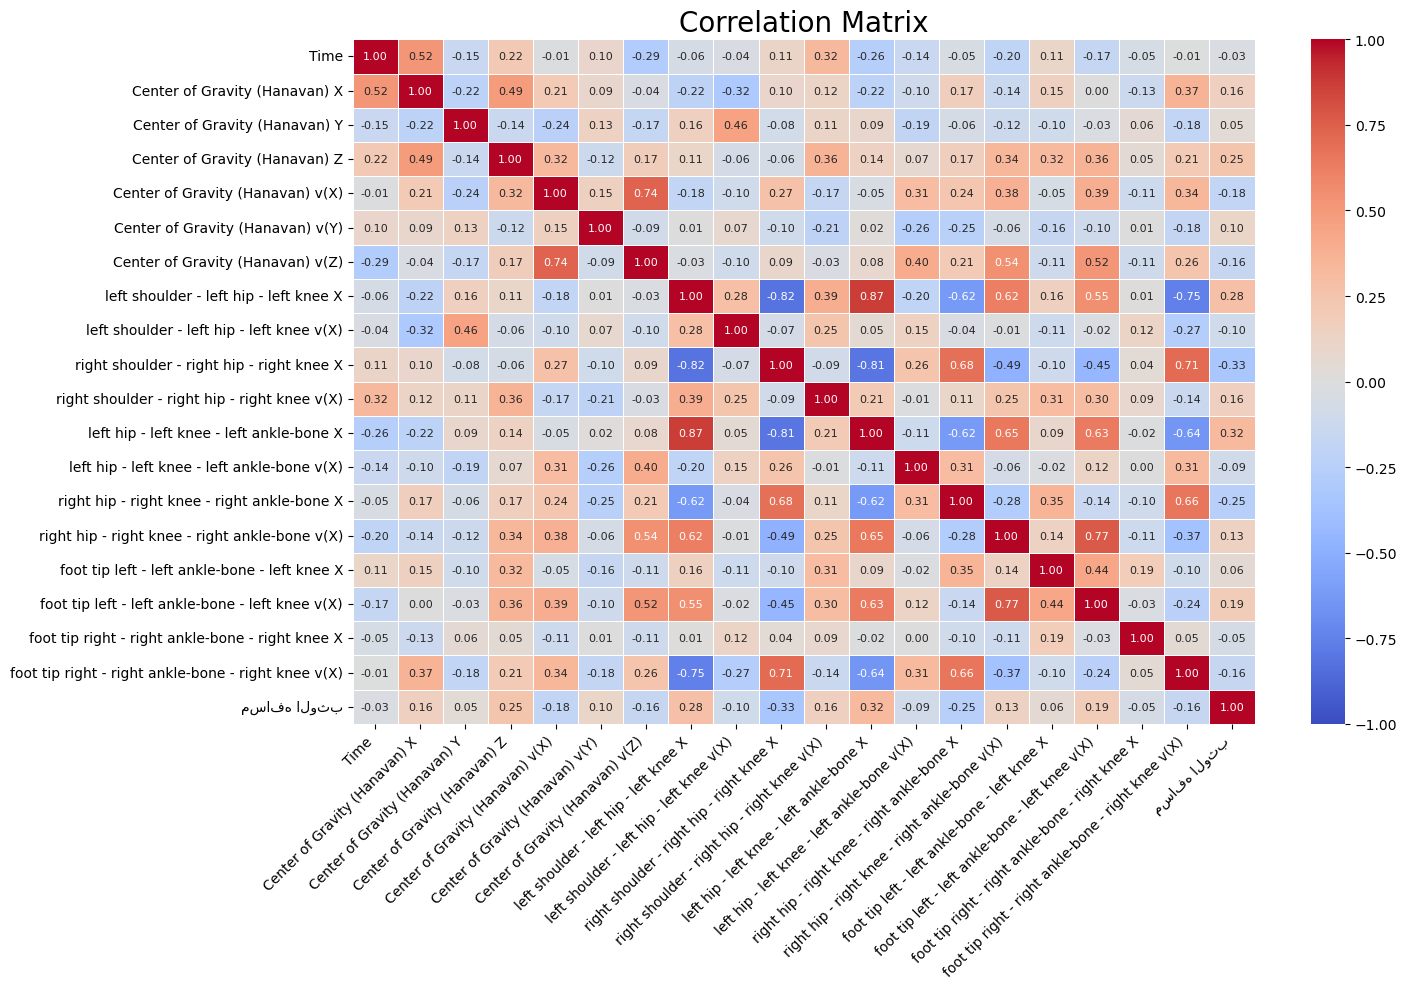

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 8})

# Title and labels
plt.title('Correlation Matrix', size=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
X

,Time,Center of Gravity (Hanavan) X,Center of Gravity (Hanavan) Y,Center of Gravity (Hanavan) Z,Center of Gravity (Hanavan) v(X),Center of Gravity (Hanavan) v(Y),Center of Gravity (Hanavan) v(Z),left shoulder - left hip - left knee X,left shoulder - left hip - left knee v(X),right shoulder - right hip - right knee X,right shoulder - right hip - right knee v(X),left hip - left knee - left ankle-bone X,left hip - left knee - left ankle-bone v(X),right hip - right knee - right ankle-bone X,right hip - right knee - right ankle-bone v(X),foot tip left - left ankle-bone - left knee X,foot tip left - left ankle-bone - left knee v(X),foot tip right - right ankle-bone - right knee X,foot tip right - right ankle-bone - right knee v(X)
0,0.100000,-0.822225,0.483825,1.253192,4.902598,-0.285815,2.368407,174.505951,374.257751,137.534866,303.063446,158.899628,368.283325,93.260620,574.992798,132.200867,771.826172,102.674591,-342.603210
1,0.100000,0.415422,0.417035,1.364334,5.518613,0.267141,1.478911,124.460739,19.571430,161.332245,-248.596085,74.852272,361.973633,159.897018,54.724731,135.568008,1.327595,140.553467,626.162842
2,0.100000,0.326139,0.508614,1.405532,4.938077,0.016228,1.621645,162.887421,-316.237244,105.887230,78.531731,156.699005,-57.205566,105.907043,696.336182,130.141541,385.303101,100.887344,-153.299240
3,0.100000,0.305519,0.480978,1.221018,4.725326,0.010720,2.011798,171.225082,-51.872910,119.355614,-82.469315,155.942764,21.811638,78.847466,499.708221,139.276031,603.528625,102.548073,-71.957558
4,0.100000,0.345535,0.302846,1.220077,4.940518,-0.027691,1.952139,169.227081,-258.405426,133.338379,196.005829,173.542847,145.012970,106.898262,745.806824,139.986008,835.975403,96.959068,85.255516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.083333,-0.355156,0.937272,1.225600,3.368959,-0.203952,1.718198,178.664566,310.096863,111.944725,144.738464,151.111969,117.051537,80.676994,568.828552,119.107040,514.918640,131.136261,92.313988
76,0.083333,0.170761,0.696069,1.074226,3.737411,-0.268282,1.460434,114.591049,22.430189,171.883255,-74.938652,46.598206,393.992493,163.034653,-50.350796,106.693436,-31.318586,119.167755,562.351196
77,0.116667,-0.093568,0.906209,1.220558,1.822996,0.108553,0.863082,171.835938,-45.475742,131.975601,143.317719,160.544617,240.634308,88.199852,239.894623,132.468079,269.387329,105.590065,-360.810120
78,0.083333,0.222484,0.802528,1.298219,3.257199,-0.219267,1.475068,178.727386,140.418106,100.281784,64.277580,156.399857,221.815811,67.986885,401.322235,125.172691,378.240082,117.640312,-104.848488


In [97]:
y

0     5.5
1     5.2
2     5.4
3     5.0
4     5.5
     ... 
75    5.2
76    5.1
77    5.2
78    5.3
79    5.8
Name: مسافه الوثب, Length: 80, dtype: float64

In [98]:
print(df.shape)
print(X.shape)
print(y.shape)

(80, 20)
(80, 19)
(80,)


In [99]:
# Assuming df is your DataFrame
column_names = X.columns
# Print the column names
print(column_names)

Index(['Time', 'Center of Gravity (Hanavan) X',
       'Center of Gravity (Hanavan) Y', 'Center of Gravity (Hanavan) Z',
       'Center of Gravity (Hanavan) v(X)', 'Center of Gravity (Hanavan) v(Y)',
       'Center of Gravity (Hanavan) v(Z)',
       'left shoulder - left hip - left knee X',
       'left shoulder - left hip - left knee v(X)',
       'right shoulder - right hip - right knee X',
       'right shoulder - right hip - right knee v(X)',
       'left hip - left knee - left ankle-bone X',
       'left hip - left knee - left ankle-bone v(X)',
       'right hip - right knee - right ankle-bone X',
       'right hip - right knee - right ankle-bone v(X)',
       'foot tip left - left ankle-bone - left knee X',
       'foot tip left - left ankle-bone - left knee v(X)',
       'foot tip right - right ankle-bone - right knee X',
       'foot tip right - right ankle-bone - right knee v(X)'],
      dtype='object')


In [100]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Capture the mean and std deviations for later use
means = scaler.mean_
std_devs = np.sqrt(scaler.var_)

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 19)
(16, 19)
(64,)
(16,)


# Linear Regression Molde

In [103]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.12074587512640647
Mean Absolute Error: 0.29276056734512235


In [104]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of LR is : {intercept}')
print(f'adjusted intercept of LR is : {adjusted_intercept}')
print(f'Coffecients LR are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Linear Regression Equation: {equation}')

Intercept of LR is : 5.2454276949519905
adjusted intercept of LR is : 5.314703214942916
Coffecients LR are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.046049   
1    X2                      Center of Gravity (Hanavan) X     0.004807   
2    X3                      Center of Gravity (Hanavan) Y     0.019494   
3    X4                      Center of Gravity (Hanavan) Z     0.047610   
4    X5                   Center of Gravity (Hanavan) v(X)    -0.048585   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.038313   
6    X7                   Center of Gravity (Hanavan) v(Z)    -0.123757   
7    X8             left shoulder - left hip - left knee X     0.095089   
8    X9          left shoulder - left hip - left knee v(X)    -0.082459   
9   X10          right shoulder - right hip - right knee X    -0.073005   
10  X11       right shoulder - right hip - right knee v(X)     0.

# Ridge Regression Model - L2

In [105]:
from sklearn.linear_model import Ridge

# Create the Ridge regression model
alpha = 1.0  # Regularization strength, you can adjust this parameter
model = Ridge(alpha=alpha)
# Fit the linear regression model

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.11800585434825092
Mean Absolute Error: 0.28962014597895286


In [106]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of Ridge is : {intercept}')
print(f'adjusted intercept of Ridge is : {adjusted_intercept}')
print(f'Coffecients Ridge are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Ridge Equation: {equation}')

Intercept of Ridge is : 5.247013363812552
adjusted intercept of Ridge is : 5.34986275018314
Coffecients Ridge are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.042781   
1    X2                      Center of Gravity (Hanavan) X     0.007395   
2    X3                      Center of Gravity (Hanavan) Y     0.022429   
3    X4                      Center of Gravity (Hanavan) Z     0.048075   
4    X5                   Center of Gravity (Hanavan) v(X)    -0.054318   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.035078   
6    X7                   Center of Gravity (Hanavan) v(Z)    -0.102014   
7    X8             left shoulder - left hip - left knee X     0.063569   
8    X9          left shoulder - left hip - left knee v(X)    -0.071588   
9   X10          right shoulder - right hip - right knee X    -0.065423   
10  X11       right shoulder - right hip - right knee v(X)

# Lasso Regression model - L1

In [107]:
from sklearn.linear_model import Lasso

# Create the Lasso regression model
alpha = 0.01  # Regularization strength, you can adjust this parameter
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.11747036354278322
Mean Absolute Error: 0.2717187599298697


In [108]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of Lasso is : {intercept}')
print(f'adjusted intercept of Lasso is : {adjusted_intercept}')
print(f'Coffecients Lasso are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Lasso Equation: {equation}')

Intercept of Lasso is : 5.252238848543363
adjusted intercept of Lasso is : 5.23792026517995
Coffecients Lasso are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.013628   
1    X2                      Center of Gravity (Hanavan) X     0.005857   
2    X3                      Center of Gravity (Hanavan) Y     0.018982   
3    X4                      Center of Gravity (Hanavan) Z     0.049965   
4    X5                   Center of Gravity (Hanavan) v(X)    -0.059208   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.010592   
6    X7                   Center of Gravity (Hanavan) v(Z)    -0.039955   
7    X8             left shoulder - left hip - left knee X     0.000000   
8    X9          left shoulder - left hip - left knee v(X)    -0.037202   
9   X10          right shoulder - right hip - right knee X    -0.048395   
10  X11       right shoulder - right hip - right knee v(X)

# Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor


# Create the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

model.fit(X_train, y_train)



# Fit the model on the entire dataset
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.059918437499999894
Mean Absolute Error: 0.19668750000000002


In [110]:
# If you want to extract feature importances:
feature_importances = model.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f'Feature X{i + 1}: {importance:.12f}')

Feature Importances:
Feature X1: 0.001425630878
Feature X2: 0.019065052048
Feature X3: 0.023186741636
Feature X4: 0.013381182709
Feature X5: 0.176401483069
Feature X6: 0.180056129236
Feature X7: 0.057529369082
Feature X8: 0.017651904423
Feature X9: 0.029081066272
Feature X10: 0.111263690000
Feature X11: 0.032990743285
Feature X12: 0.079744574446
Feature X13: 0.039754605640
Feature X14: 0.054319001201
Feature X15: 0.067181844464
Feature X16: 0.023818184428
Feature X17: 0.014225489030
Feature X18: 0.009348312314
Feature X19: 0.049574995840
